In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import submissions
submission_1_name = 'xgb_submission_151.75.csv'
submission_2_name = 'xgb_submission.csv'

submission_1 = pd.read_csv(submission_1_name)
submission_2 = pd.read_csv(submission_2_name)

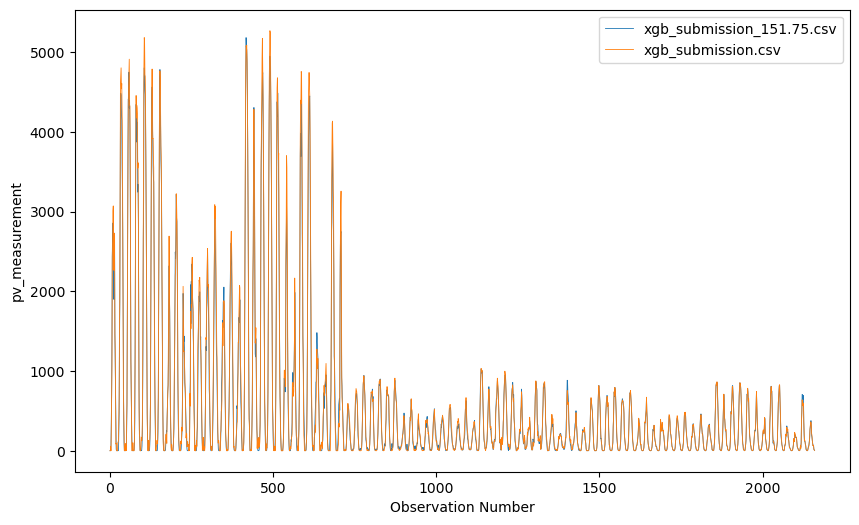

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(submission_1['prediction'].reset_index(drop=True), label=submission_1_name, linewidth=0.6)
plt.plot(submission_2['prediction'].reset_index(drop=True), label=submission_2_name, linewidth=0.6)
plt.xlabel('Observation Number')
plt.ylabel('pv_measurement')
plt.legend()
plt.savefig('true_vs_pred.png')
plt.show()